# 2장 머신러닝 프로젝트 처음부터 끝까지 #

## 실제 데이터로 작업하기 ##
2장에서는 실제 데이터로 작업하는 과정을 살펴 진행. 주택 가격을 예측하는 회귀 작업을 살펴보면서  
선형회귀(linear regression), 결정 트리(decesion tree), 랜덤 포레스트(random froest) 등  
여러 알고리즘을 사용  

### 준비 ###

datasets download

(https://github.com/rickiepark/handson-ml2)

In [17]:
# Import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### datasets load ###
판다스의 read_csv 함수를 이용해서 csv 파일을 읽는다.


한글이 깨지는 경우는 encoding = 'utf8' | encoding = 'euc-kr' | encoding = 'cp949' 입력

dataset의 용량이 크다면 chunksize 지정해서 불러오기

In [3]:
# datasets load
housing = pd.read_csv('D:\CodingData\mljnu\handson-ml2-master\datasets\housing\housing.csv', encoding='utf8')

### dataset 분석 ###

In [4]:
# head 활용
housing.head() #default = 5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


각 column 명, 개수 확인 가능

In [5]:
# info 활용
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


sample : 20640개
column 4에 결측치 207개 있음  
column 0 ~ 8 dtype : float64  
column 9 dtype : object  

In [6]:
# describe 활용
housing.describe()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


각 column의 기술통계량을 보여주는 함수  

참고 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

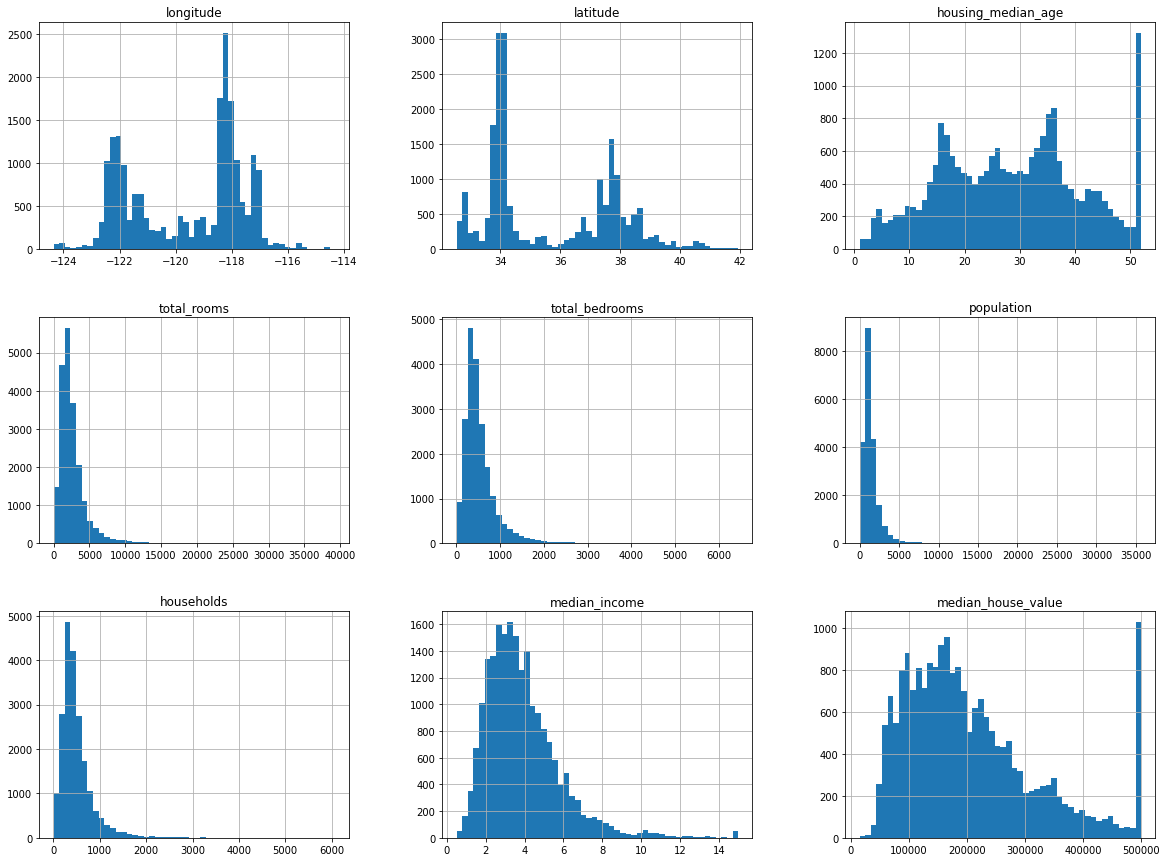

In [7]:
# hist 활용
housing.hist(bins=50, figsize=(20, 15))

data 분포가 좌측으로 치우처짐을 알 수 있음

### dataset split ###

dataset을 train_set 과 test_set으로 구분하고 test_set는 열어보고 분석하지 않는다.  
test_set을 미리 분석하면 데이터 스누핑 편향(data snooping bias)을 범할 가능성이 높아진다.  
분할(split)비율은 일반적으로 train_set : test_set = 8 : 2이지만, 고정값은 아니다.  

분할 방법으로는 무작위 샘플링 방식과 계층적 샘플랑 방식이 있고,  
여기서는 계층적 샘플링 방식을 사용해서 dataset을 분할한다.

#### 참고 : 무작위 샘플링 ####

In [8]:
# 무작위 샘플링 분할 함수 생성

def split_train_test(data, test_ratio) : # 함수에 dataset과 테스트 세트의 비율(ex 0.2)을 입력 하면,
    shuffled_indices = np.random.permutation(len(data)) # np.random.permutation을 통해 셔플
    test_set_size = int(len(data) * test_ratio) # 테스트 세트의 사이즈는 총 데이터 길이(개수) * 비율(0.2)
    test_indices = shuffled_indices[:test_set_size] # test_Set는 셔플된 dataset의 처음부터 테스트세트 비율 전까지
    train_indices = shuffled_indices[test_set_size:] # train_set는 나머지
    
    return data.iloc[train_indices], data.iloc[test_indices] # 분할 완료의 결과물 return



# 함수 사용해서 분할
train_set, test_set = split_train_test(housing, 0.2)

# 개수 확인
print(len(train_set))
print(len(test_set))

16512
4128


무작위 샘플링을 진행함에 있어서 매번 셔플을 진행하다보면 train_set과 test_set의 구성이 매번 바뀌게 된다.  
문제는 매번 셔플이 진행되면서 모든 dataset을 분석하게 되어, 결국 test_set까지 분석되게 된다.  
이를 방지하기 위해 랜덤 시드를 고정하거나, 각 샘플마다의 해시값을 계산한 인덱스를 기준으로 분할하는 방법을 사용해야한다.

In [ ]:
# sklearn에서 제공하는 함수 이용
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### 계층적 샘플링 ####
data class portion을 고려한 train, test data split  
전체 계층을 대표하도록 각 계층별로 비율을 맞춰서 분할해야한다.


In [13]:
# 적절한 계층 분할을 위해 범주 생성
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins= [0, 1.5, 3.0, 4.5, 6, np.inf],
    labels=[1, 2, 3, 4, 5])

In [14]:
# income_cat cloumn 생성 확인
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

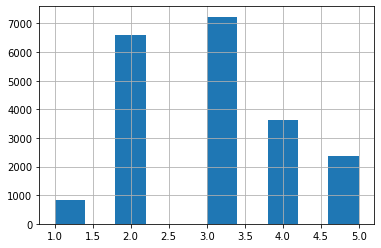

In [16]:
# 시각화
housing["income_cat"].hist()

계층 나누기까지 끝났으니, 이제 계층 샘플링을 진행

참고 : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [29]:
# sklearn에 있는 함수를 이용
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state= 42) # n_splites : 셔플 분할 횟수, test_size : test_set 사이즈, random_state : 랜덤 시드 지정

for train_index, test_index in split.split(housing, housing["income_cat"]): # split(housing을 housing["income_cat"]을 기준으로) -> 각 분할한 결과의 index의 list를 반환하고,
    strat_train_set = housing.loc[train_index] # 그 index list를 받아서 strat_train_set로 사용 
    strat_test_set = housing.loc[test_index] # 그 index list를 받아서 strat_test_set로 사용


계층적 샘플링이 잘 되었는지 알아보기 위해  
train_set의 계층 분할 비율과 전체 dataset의 계층 분할 비율을 비교해본다.

In [34]:
# 비율 분할 비율 확인
train_set_portion = strat_train_set["income_cat"].value_counts() / len(strat_train_set)

dataset_portion = housing["income_cat"].value_counts() / len(housing)

print(train_set_portion)
print(dataset_portion)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [35]:
# 계층별 오차 체크
print(dataset_portion - train_set_portion)

3   -0.000012
2   -0.000012
4    0.000012
5   -0.000024
1    0.000036
Name: income_cat, dtype: float64


각 계층별 오차가 매우 작음을 보면 계층적 샘플링이 잘 되었음을 확인할 수 있다.

책에서는 분할된 각 set의 'income_cat' column을 삭제를 요구하지만 여기서는 그냥 삭제하지 않고 진행  
pd.drop('삭제할 column', axis=삭제할 축, inlace = true(원본 반영))을 이용해서 삭제

### 데이터 이해를 위한 탐색과 시각화 ###  
앞에서 dataset 분할을 끝냈으면, test_set은 분석에서 제외해야함  
오직 train_set를 이용  
  
데이터의 종류를 파악하기 위해 데이터를 살펴볼 필요가 있다.

In [36]:
# train_set를 기본 dataset로 지정
housing = strat_train_set.copy() # copy()를 이용해서 복사

pandas.dataframe.plot.scatter  
참고 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html?highlight=scatter%20plot#pandas.DataFrame.plot.scatter

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

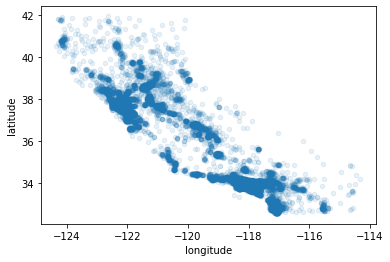

In [39]:
# 위도와 경도를 이용한 산점도
housing.plot(kind = "scatter", x = "longitude", y='latitude', alpha = 0.1) # alpha : 투명도 옵션

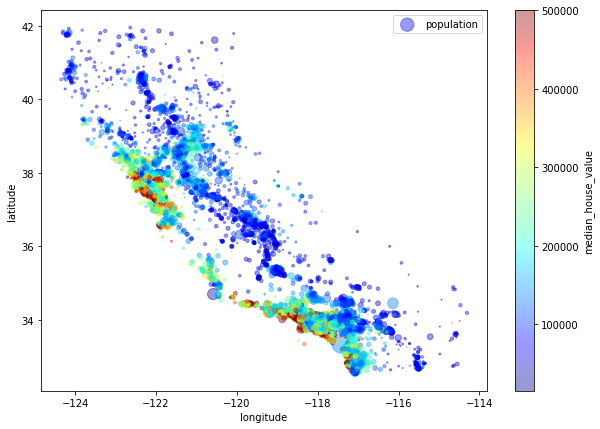

In [47]:
# 위도, 경도, 인구, 주택가격 중간값 이용한 산점도
housing.plot(kind = "scatter", x = "longitude", y='latitude', alpha = 0.4, 
s = housing["population"]/100, label = "population", figsize = (10,7), 
c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True, sharex = False)

plt.legend()

In [53]:
# 상관계수를 이용한 분석
corr_matrix = housing.corr() # corr() 속성을 이용해서 각 column끼리의 상관계수를 확인

corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [54]:
# 주택 중간 가격을 기준으롤 상관 관계 분석
corr_matrix["median_house_value"].sort_values(ascending=False) # 상관계수 중에서 "median_house_value"과 다른 column의 선형 관계성을 파악, 내림차순으로 정렬까지

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

상관 계수는 선형 관계를 파악하는 것 뿐이다.  
관계성의 유무와 무관하고, 상관 계수가 높다고 해서 반드시 관련이 있다는 것과는 필요충분조건을 만족하지 않는다.